In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-dataset/EDA_500.csv


# Problem Statement
Develop an algorithm that takes into account the environmental conditions, location, and available infrastructure to predict the potential growth of crops in urban areas and Identify Crops suitable for Urban farming inlcuing environmental, climatic conditions in urban areas.

In [2]:
df=pd.read_csv("/kaggle/input/crop-dataset/EDA_500.csv")
df.head(5)

Soil_Type Fertility       Photoperiod N-P-K Ratio  Temperature  \
0  Sandy Loam      High  Short Day Period    10:10:10    21.040031   
1  Sandy Loam      High  Short Day Period    10:10:10    26.488870   
2  Sandy Loam      High  Short Day Period    10:10:10    26.080255   
3  Sandy Loam      High  Short Day Period    10:10:10    24.915214   
4  Sandy Loam      High  Short Day Period    10:10:10    26.567407   

     Rainfall        pH  Light_Hours  Light_Intensity         Rh    Nitrogen  \
0  487.325073  6.522558     6.957985       632.013531  54.621752  138.825546   
1  504.266109  5.546069     6.837064       554.684016  51.988385  140.493337   
2  517.932176  6.208011     6.524897       544.839341  57.867416  146.952909   
3  481.271518  6.455199     6.580255       390.217747  54.299459  138.305047   
4  486.119339  6.085407     6.344331       627.754487  57.001604  145.647511   

   Phosphorus   Potassium        Yield Category_pH  Season      Name  
0  165.487413  339.745203  63.20371897  low_acidic    Fall  Tomatoes  
1  163.022717  310.917259   61.7722084  low_acidic  Spring  Tomatoes  
2  169.138527  309.751116  62.87869779  low_acidic  Spring  Tomatoes  
3  153.326427  309.024518  60.51065445  low_acidic  Spring  Tomatoes  
4  159.974655  320.072464  62.05118102  low_acidic    Fall  Tomatoes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Soil_Type        17000 non-null  object 
 1   Fertility        17000 non-null  object 
 2   Photoperiod      17000 non-null  object 
 3   N-P-K Ratio      17000 non-null  object 
 4   Temperature      17000 non-null  float64
 5   Rainfall         17000 non-null  float64
 6   pH               17000 non-null  float64
 7   Light_Hours      17000 non-null  float64
 8   Light_Intensity  17000 non-null  float64
 9   Rh               17000 non-null  float64
 10  Nitrogen         17000 non-null  float64
 11  Phosphorus       17000 non-null  float64
 12  Potassium        17000 non-null  float64
 13  Yield            17000 non-null  object 
 14  Category_pH      17000 non-null  object 
 15  Season           17000 non-null  object 
 16  Name             17000 non-null  object 
dtypes: float64(9

In [4]:
df.isnull().sum()

Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Yield              0
Category_pH        0
Season             0
Name               0
dtype: int64

**Categorical Values**


In [5]:
#number of samples per soil_type
soil_type_counts= df['Soil_Type'].value_counts()
print('Unique Values for Soil Type and counts:', soil_type_counts)

Unique Values for Soil Type and counts: Soil_Type
High          6500
Moderate      4500
Loamy         2500
Sandy Loam    1500
moderate      1000
Sandy loam     500
Sandy          500
Name: count, dtype: int64


In [6]:
fertility_counts= df['Fertility'].value_counts()
print('Unique Values for Ferility and counts:', fertility_counts)

Unique Values for Ferility and counts: Fertility
Short Day Period, Day Neutral                     8500
High                                              3500
moderate                                          1500
Short Day Period                                  1500
Short Day Period, Day Neutral, Long Day Period    1500
Day Neutral, Long Day Period                       500
Name: count, dtype: int64


In [7]:
photoperiod_counts= df['Photoperiod'].value_counts()
print('Unique Values for Photoperiod and counts:', photoperiod_counts)

Unique Values for Photoperiod and counts: Photoperiod
Short Day Period    5000
10-10-2010          5000
10:10:10            1500
05-10-2005          1000
75:37.5:37.5         500
5:10:10              500
5:10:05              500
22:12:13             500
8:15:36              500
13:13:13             500
20-10-2020           500
05-10-2010           500
06-06-2006           500
Name: count, dtype: int64


In [8]:
n_p_k_ratio_counts= df['N-P-K Ratio'].value_counts()
print('Unique Values for N-P-K and counts:', n_p_k_ratio_counts)

Unique Values for N-P-K and counts: N-P-K Ratio
10:10:10    4000
5:10:10     1000
5:14:04        4
9:22:03        3
7:37:47        3
            ... 
4:05:08        1
20:26:07       1
10:04:48       1
13:41:03       1
18:19:20       1
Name: count, Length: 11172, dtype: int64


In [9]:
category_ph_counts=df['Category_pH'].value_counts()
print('Unique Values for Category pH and counts',category_ph_counts)

Unique Values for Category pH and counts Category_pH
Loamy         8497
low_acidic    3759
Sandy loam    2003
Sandy Loam    1264
neutral       1241
Loam           236
Name: count, dtype: int64


In [10]:
season_counts = df['Season'].value_counts()
print(season_counts)

Season
Fall      5604
Spring    5531
Summer    4864
Winter    1001
Name: count, dtype: int64


# Relationships, and Insights with Categorical Variables

Season vs. Crop Yield for each type of crop

How does Season affect the crop

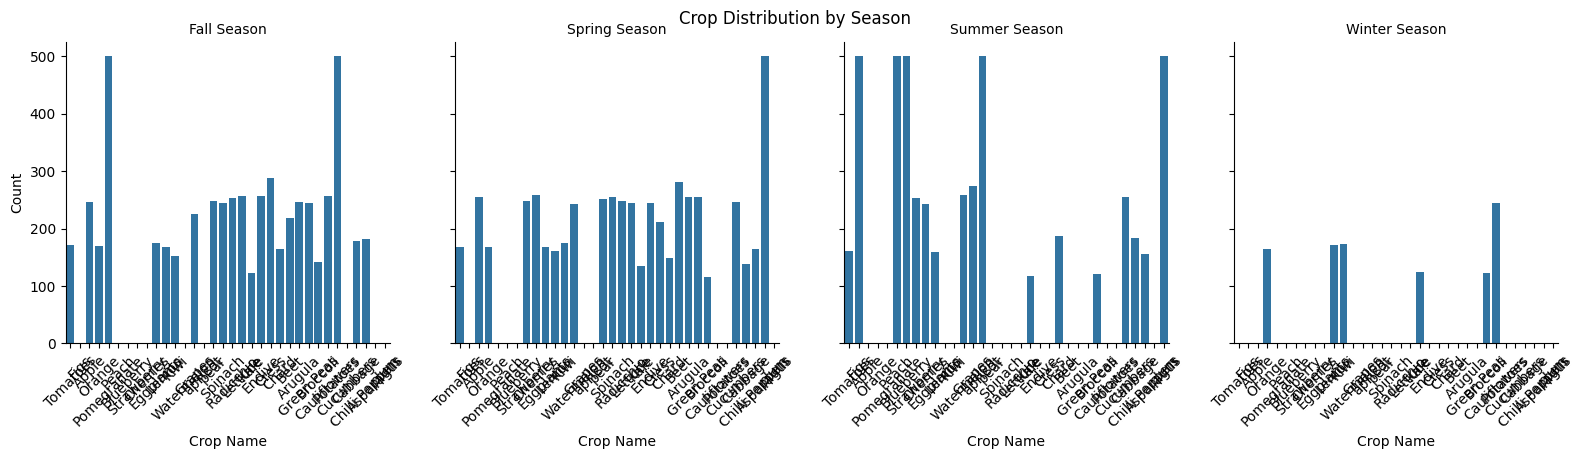

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col='Season', col_wrap=4, height=4)
g.map(sns.countplot, 'Name', order=df['Name'].value_counts().index)

# Set titles and labels
g.set_titles("{col_name} Season")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set_xlabel('Crop Name')
    ax.set_ylabel('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Crop Distribution by Season')
plt.show()

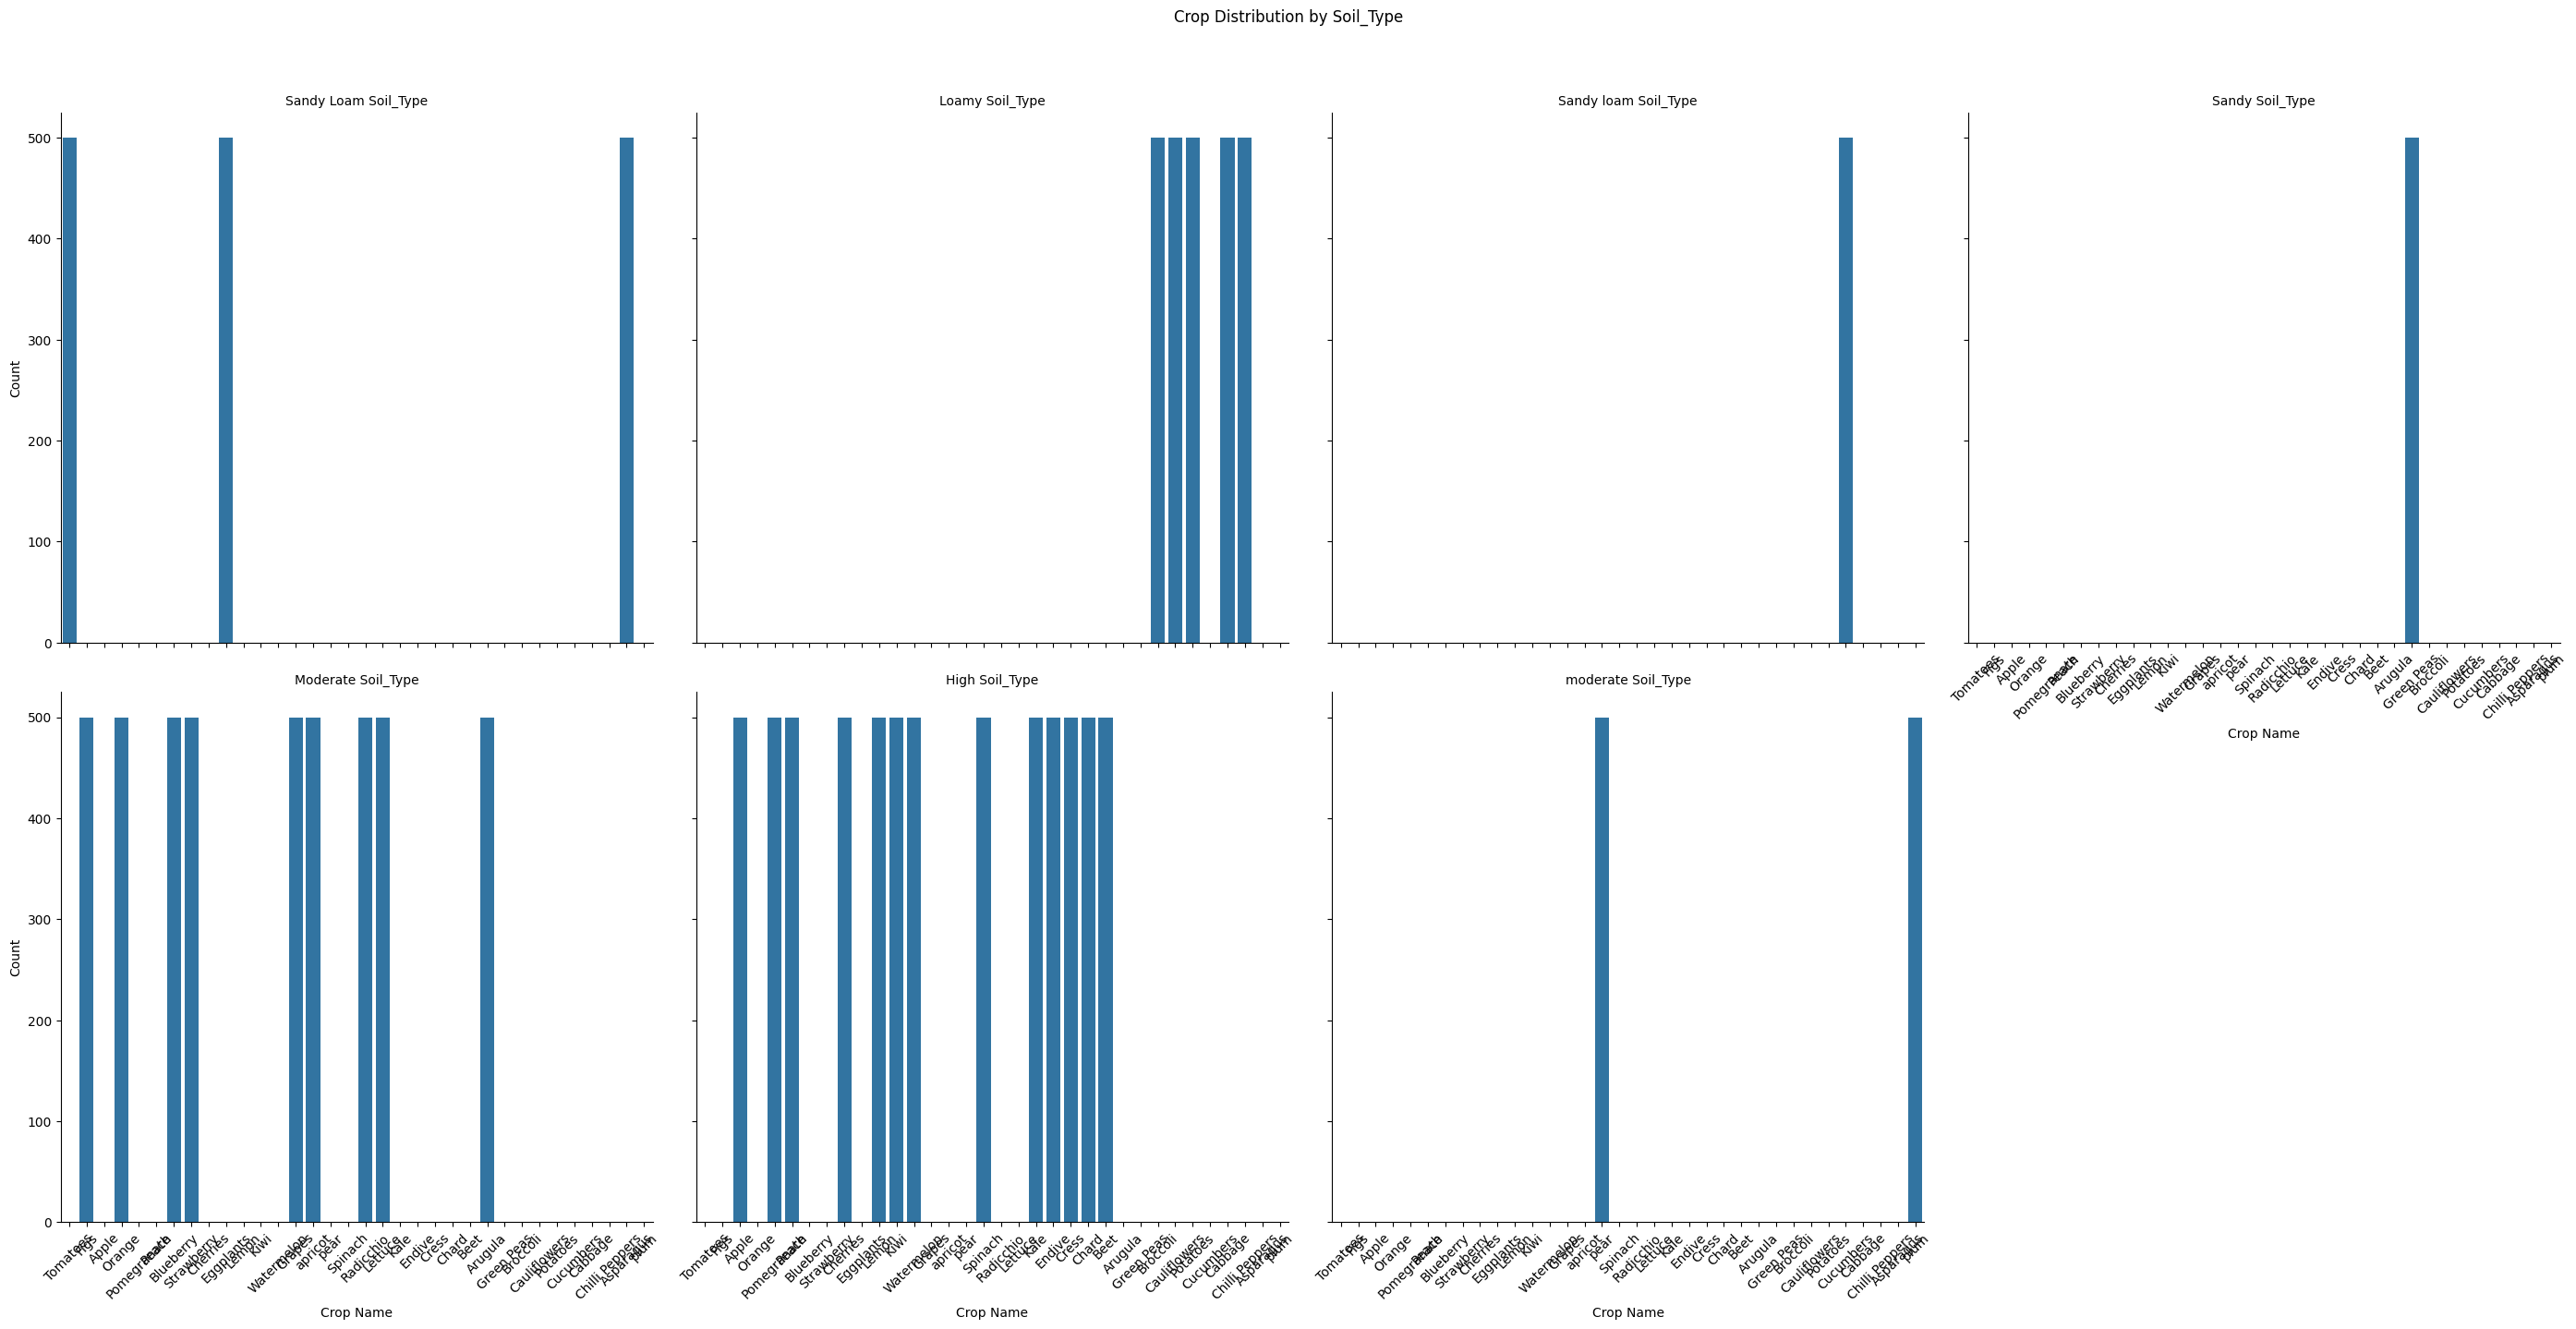

In [12]:
#Soil_Type vs. Crop  for each type of crop
#How does Season affect the crop
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col='Soil_Type', col_wrap=4, height=7)
g.map(sns.countplot, 'Name', order=df['Name'].value_counts().index)

# Set titles and labels
g.set_titles("{col_name} Soil_Type")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set_xlabel('Crop Name')
    ax.set_ylabel('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Crop Distribution by Soil_Type')
plt.show()

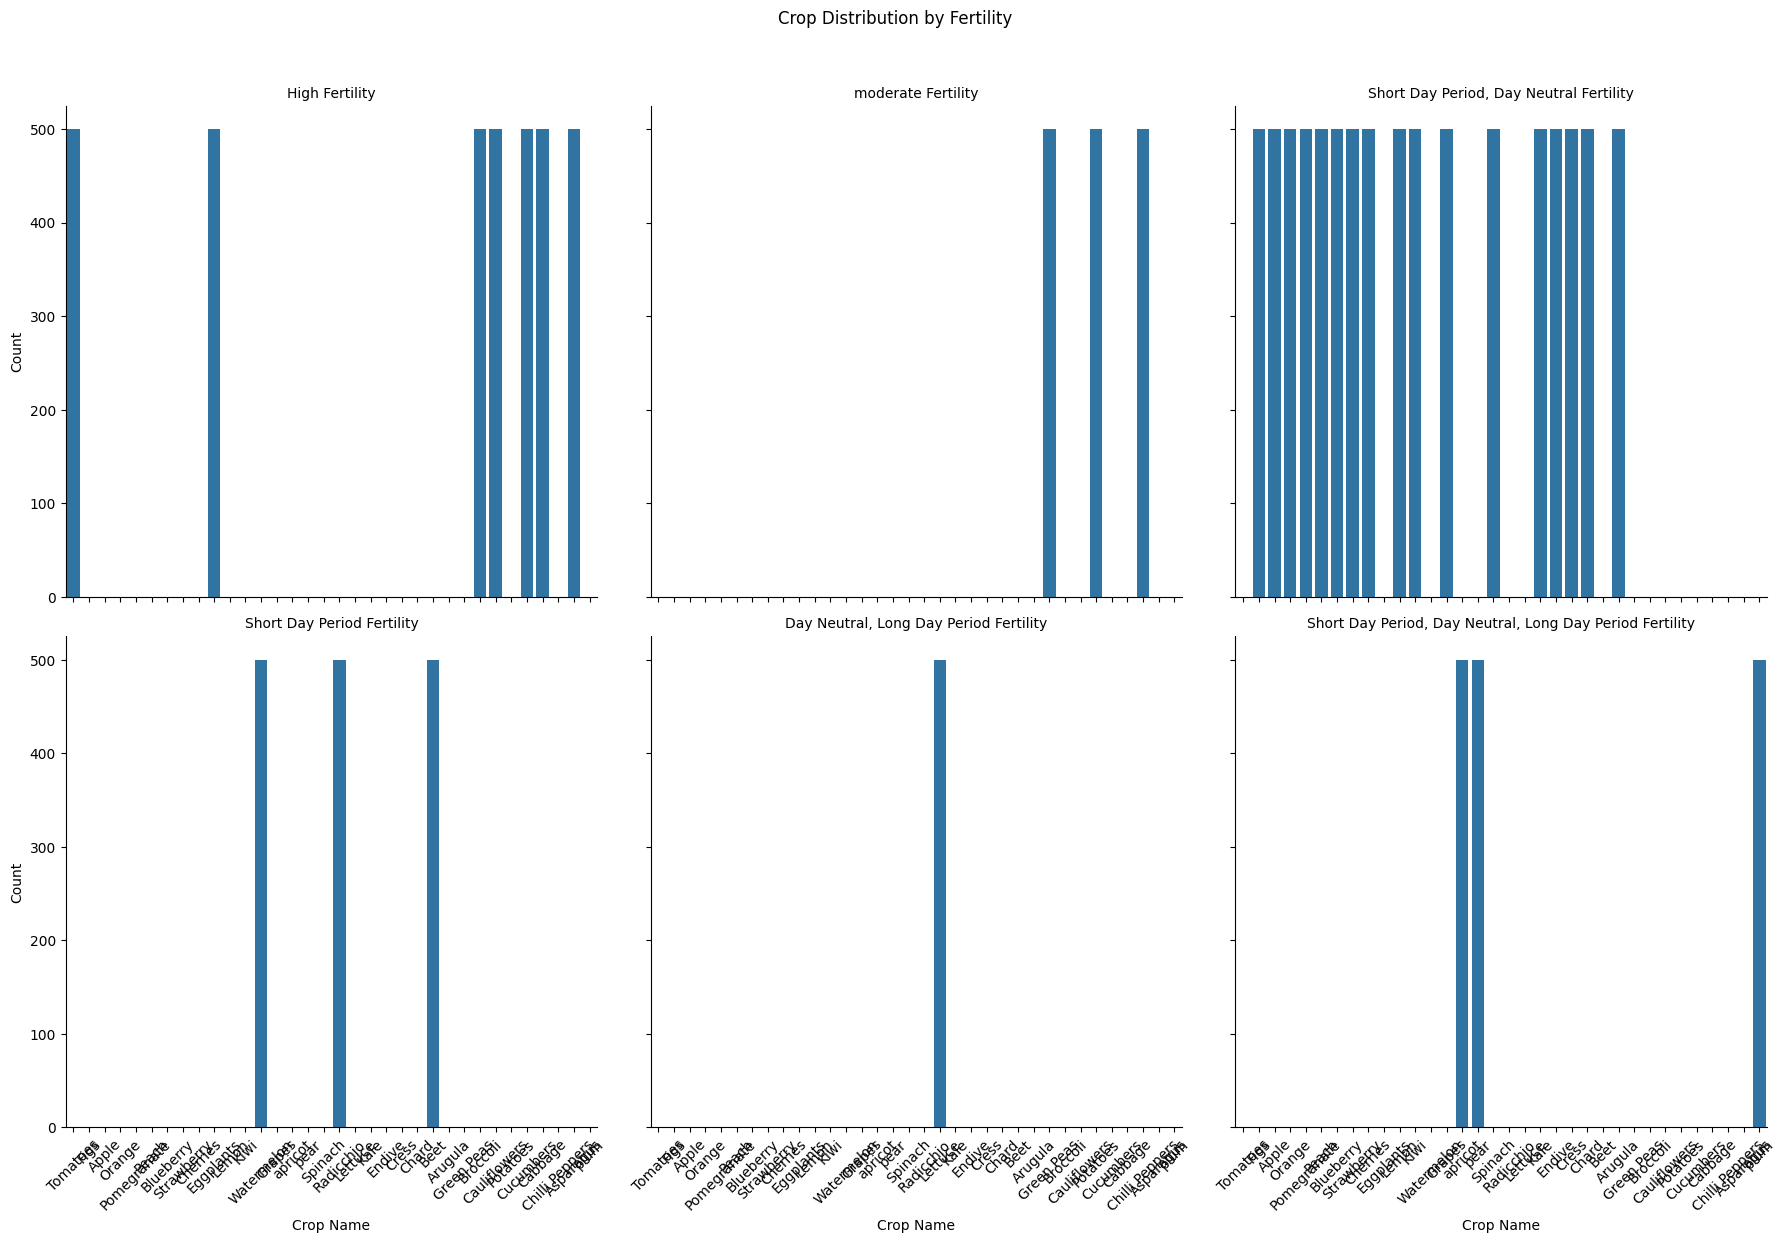

In [15]:
#Fertility vs. Crop  for each type of crop
#How does Fertility affect the crop
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col='Fertility', col_wrap=3, height=6)
g.map(sns.countplot, 'Name', order=df['Name'].value_counts().index)

# Set titles and labels
g.set_titles("{col_name} Fertility")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set_xlabel('Crop Name')
    ax.set_ylabel('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Crop Distribution by Fertility')
plt.show()

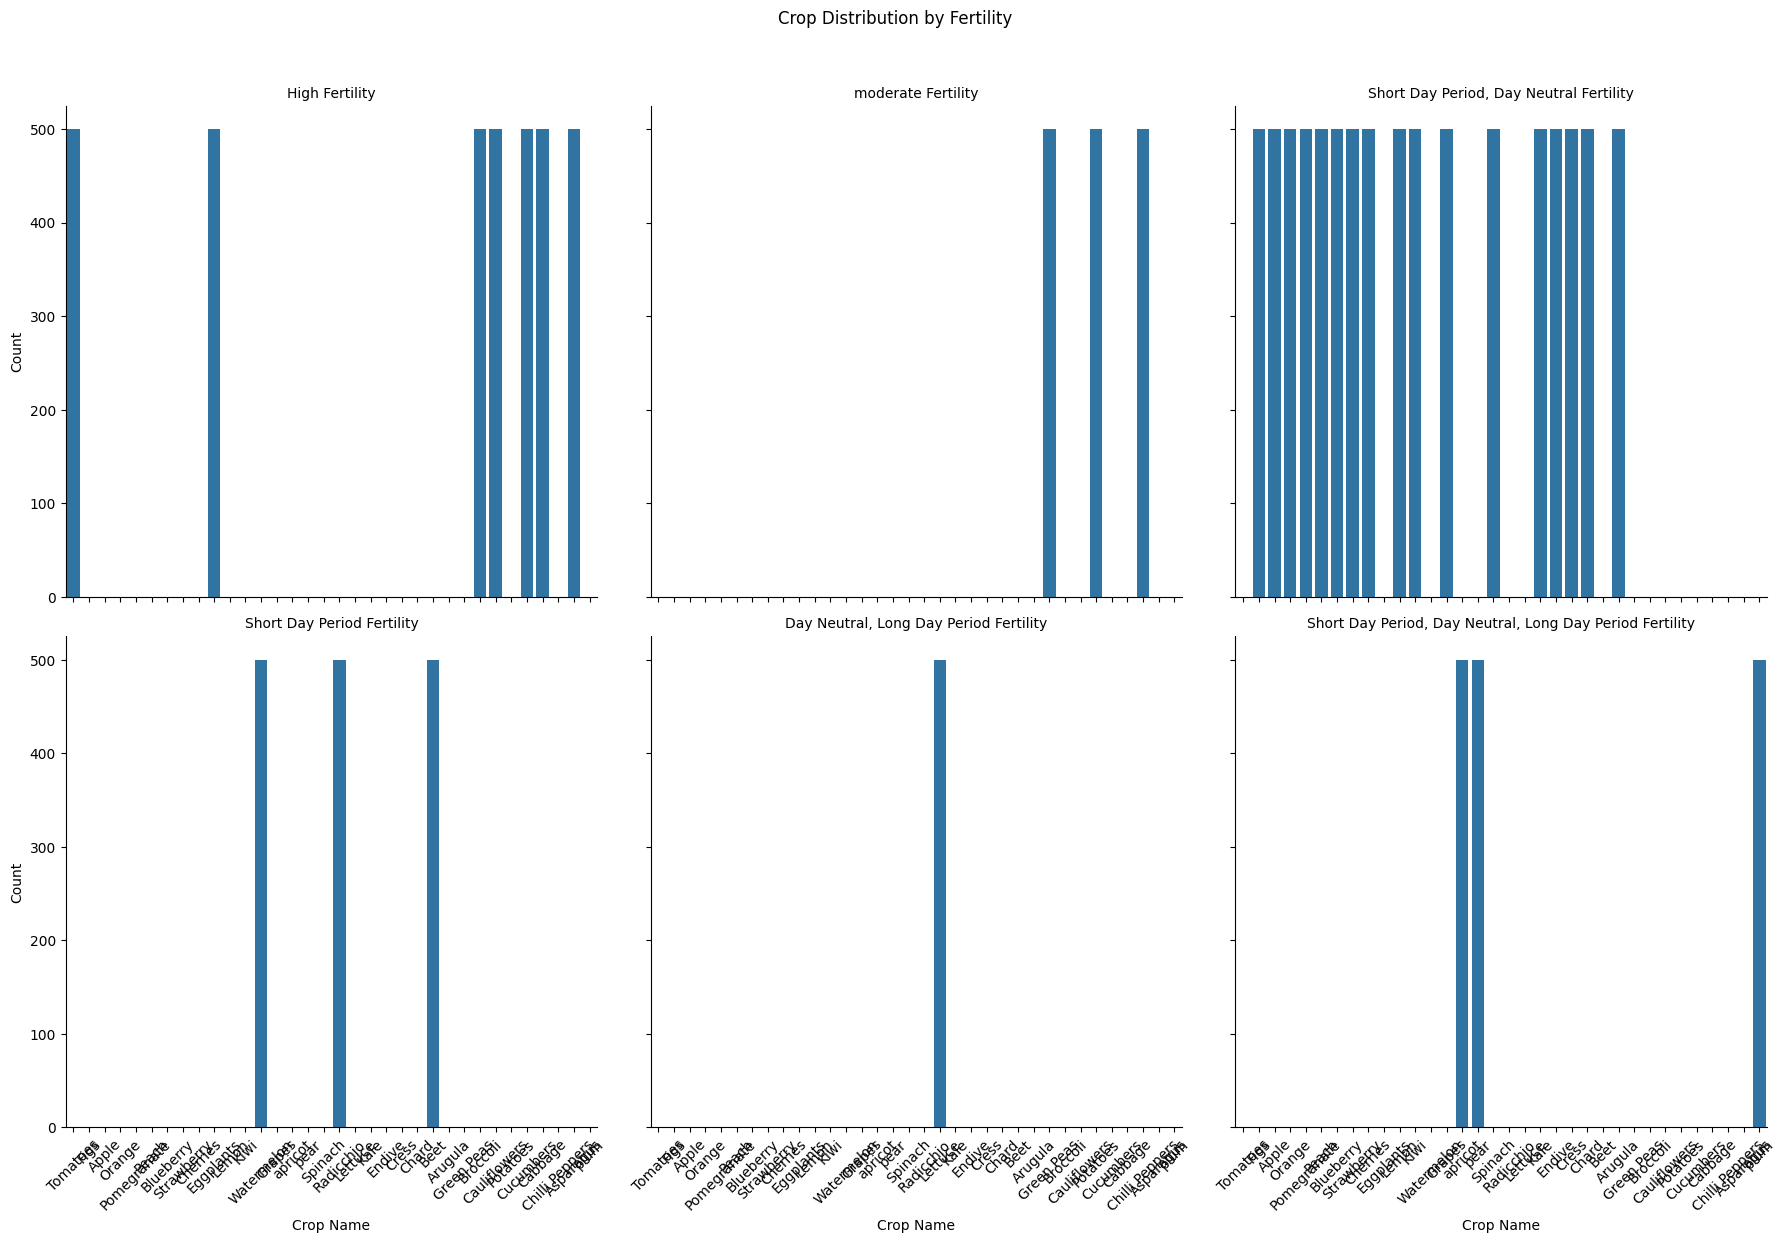

In [16]:
#Fertility vs. Crop  for each type of crop
#How does Fertility affect the crop
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col='Fertility', col_wrap=3, height=6)
g.map(sns.countplot, 'Name', order=df['Name'].value_counts().index)

# Set titles and labels
g.set_titles("{col_name} Fertility")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set_xlabel('Crop Name')
    ax.set_ylabel('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Crop Distribution by Fertility')
plt.show()

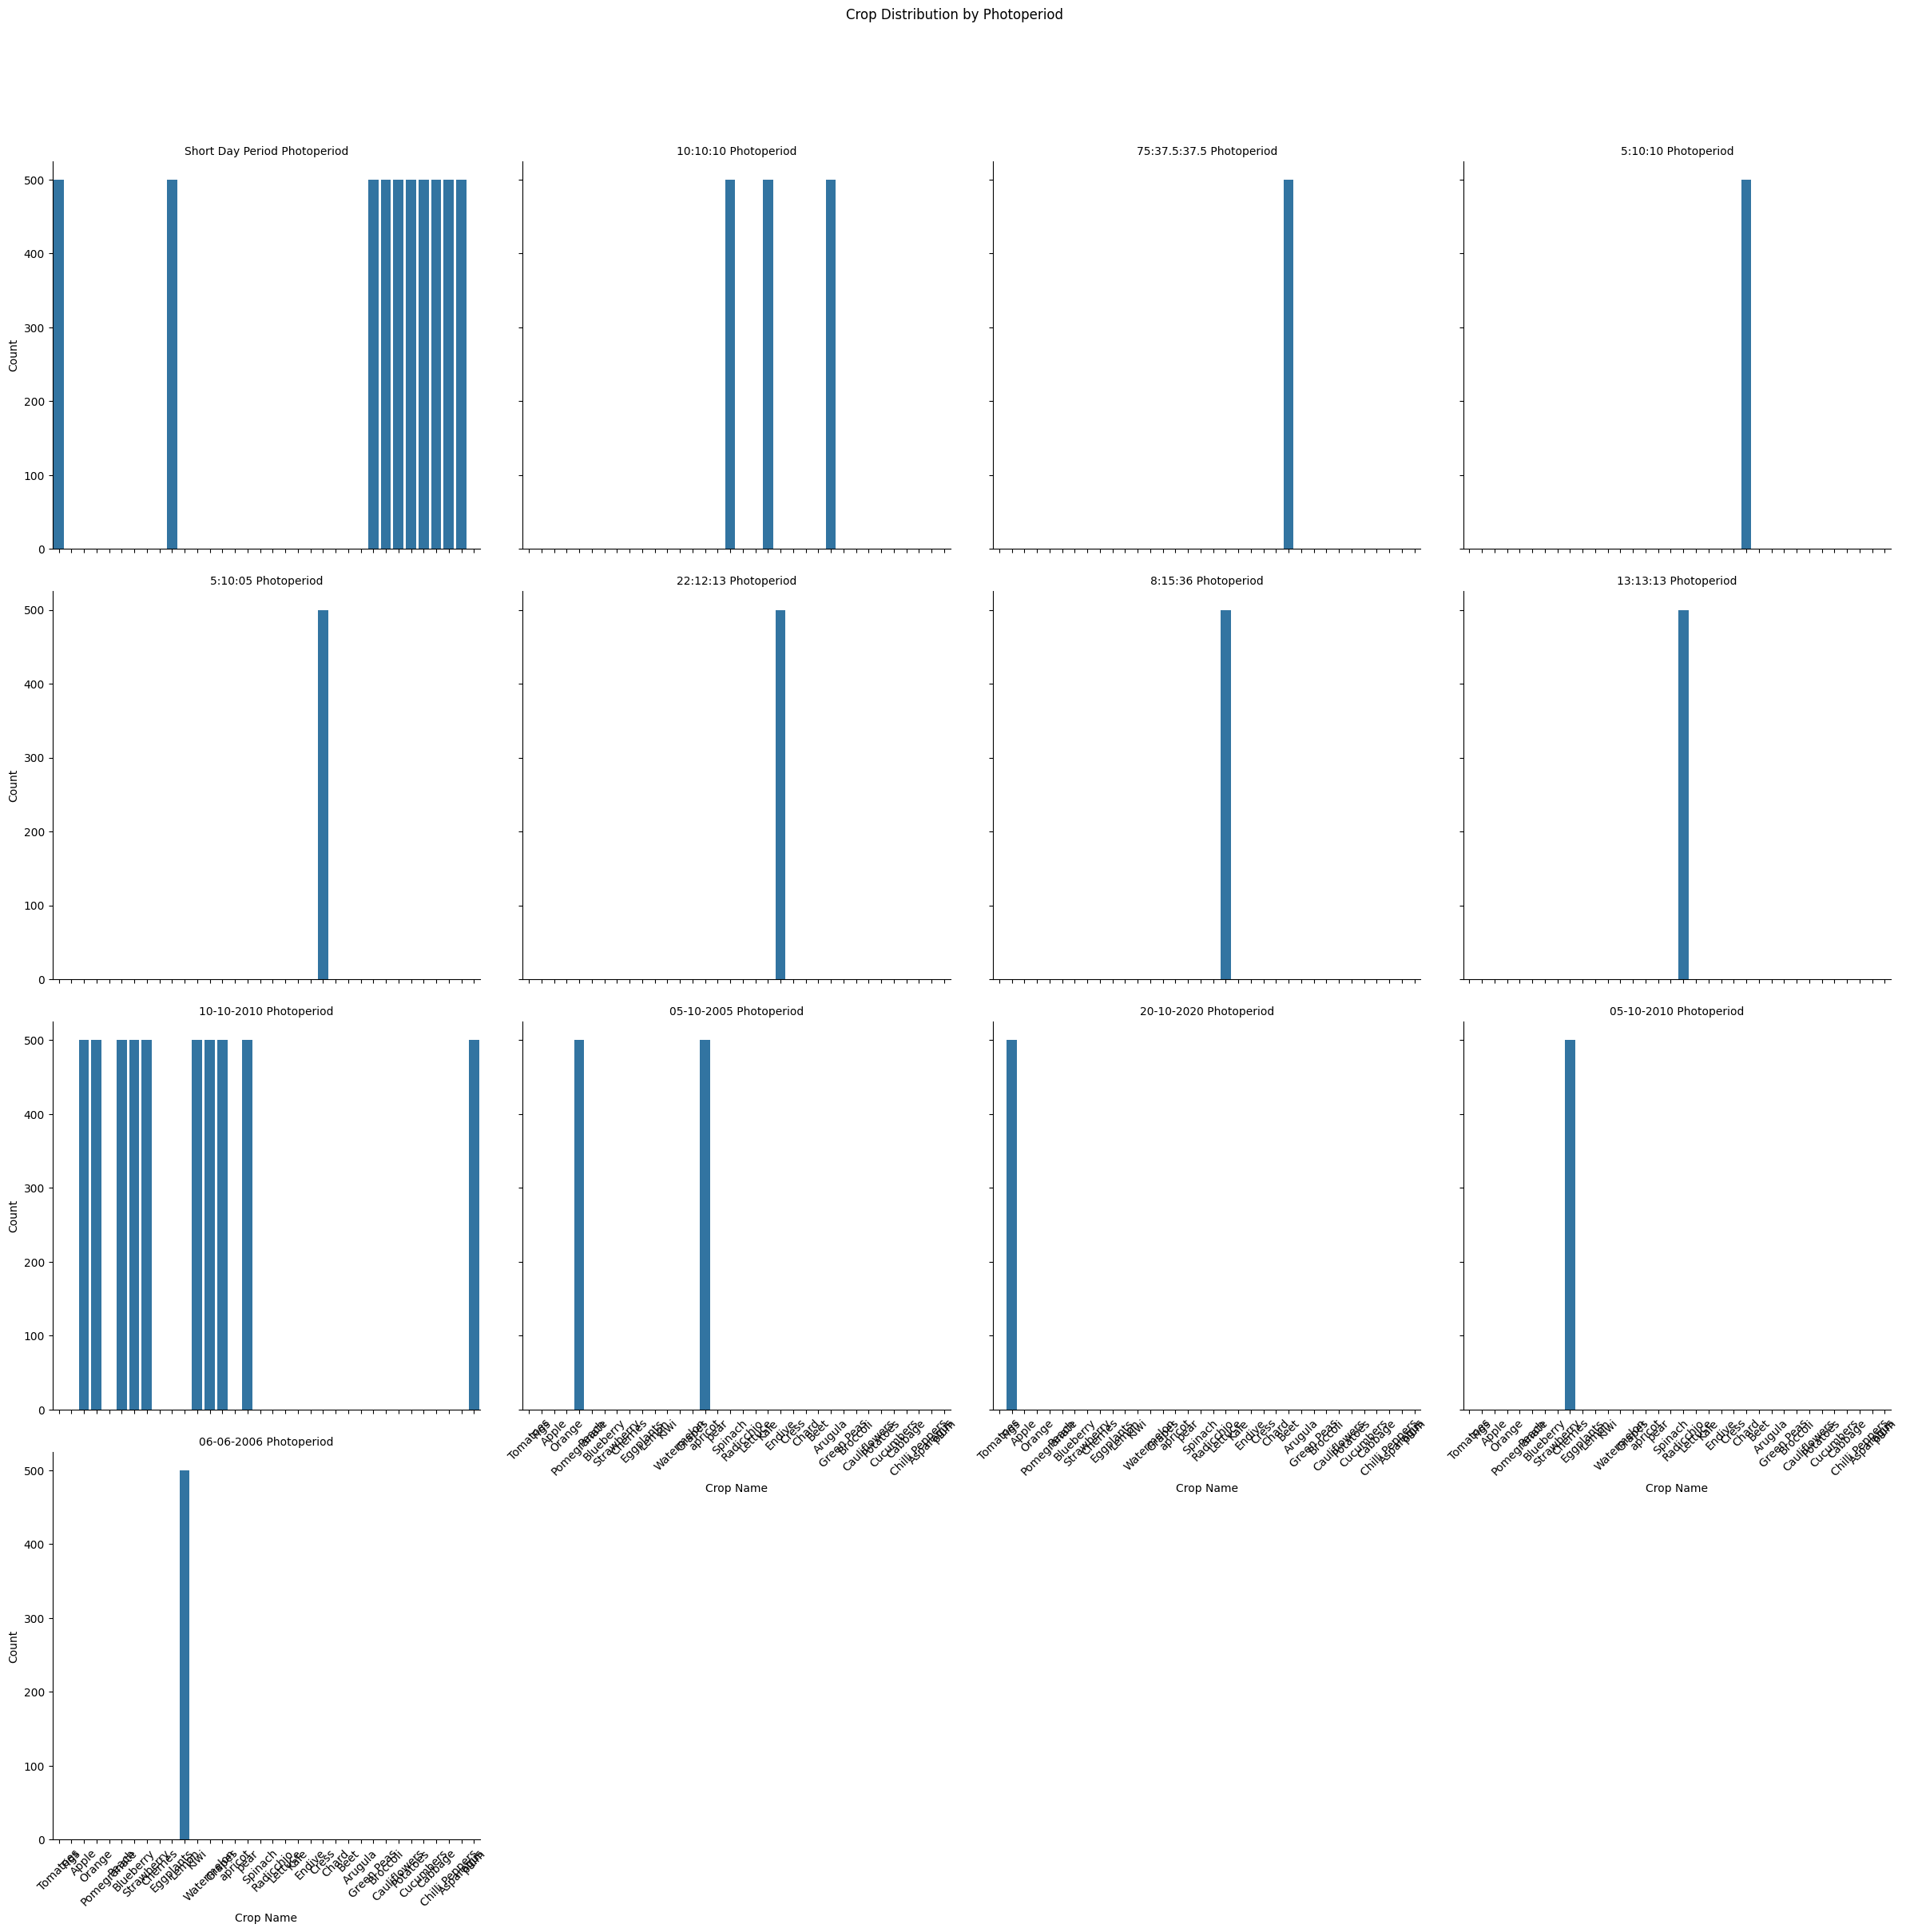

In [18]:
#Photoperiod vs. Crop  for each type of crop
#How does Fertility affect the crop
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col='Photoperiod', col_wrap=4, height=6)
g.map(sns.countplot, 'Name', order=df['Name'].value_counts().index)

# Set titles and labels
g.set_titles("{col_name} Photoperiod")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set_xlabel('Crop Name')
    ax.set_ylabel('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Crop Distribution by Photoperiod')
plt.show()

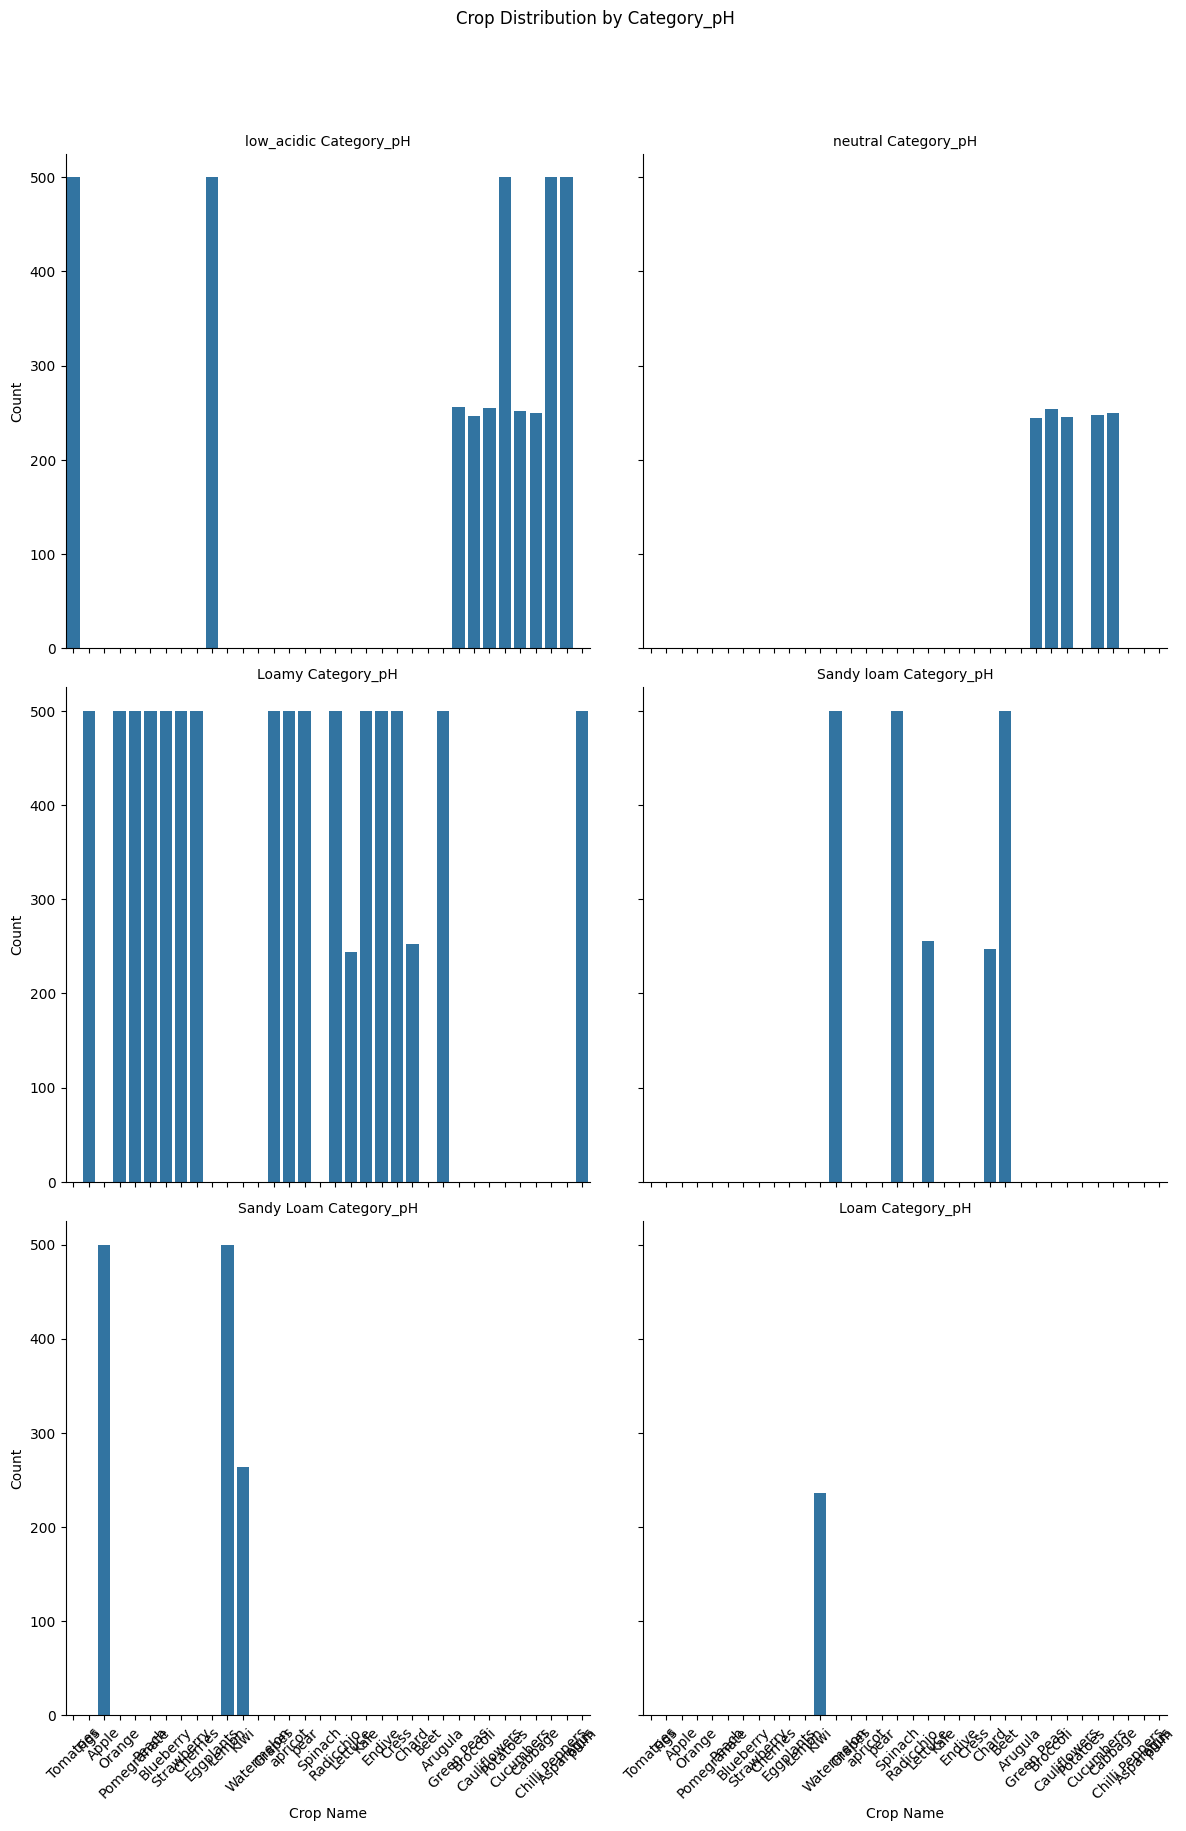

In [19]:
#Category_pH vs. Crop  for each type of crop
#How does Category_pH affect the crop
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col='Category_pH', col_wrap=2, height=6)
g.map(sns.countplot, 'Name', order=df['Name'].value_counts().index)

# Set titles and labels
g.set_titles("{col_name} Category_pH")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set_xlabel('Crop Name')
    ax.set_ylabel('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Crop Distribution by Category_pH')
plt.show()

# **Correlation Matrix for Numerical Features**

# Continuous, Numeric Variables

1. Temperature (float64): Average temperature (in degrees Celsius)
1. Rainfall (float64): Amount of rainfall (in millimeters)
1. pH (float64): pH level of the soil
1. Light_Hours (float64): Number of light hours per day
1. Light_Intensity (float64): Intensity of light received (in lumens)
1. Rh (float64): Relative humidity (percentage)
1. Yield (float64): Yield of the vegetable (in tons per hectare)
1. Nitrogen (float64): Rate of Nitrogen  in the soil
1. Phosphorus (float64): Rate of  Phosphorus in the soil
1. Potassium (float64): Ratio of Potassium (K) in the soil

In [23]:
#basic descriptive stats:
df.describe()

Temperature      Rainfall            pH   Light_Hours  \
count  17000.000000  17000.000000  17000.000000  17000.000000   
mean     789.193234    269.802688     10.273813    297.916334   
std      597.840563    429.857961      3.168894    275.215883   
min        7.816589      3.038367      4.908668      5.733029   
25%       24.703671      6.310682      6.537360      9.131184   
50%      789.658736      6.687132     12.023648    248.934051   
75%     1148.792252    635.414039     13.037446    508.985905   
max     2553.318516   1587.844114     16.293481   1026.633918   

       Light_Intensity            Rh      Nitrogen    Phosphorus     Potassium  
count     17000.000000  17000.000000  17000.000000  17000.000000  17000.000000  
mean        188.803998    115.252828    115.761994    142.890532     73.926233  
std         177.703038     55.467886     81.365462     71.153388    112.124072  
min          31.016205     40.382485     19.812274     13.236823      0.710081  
25%          88.291391     67.653446     54.114753     86.313741      7.060132  
50%          92.712352    111.707925    100.834669    134.484480     17.986450  
75%         338.899333    154.789937    148.079500    198.655658    125.786860  
max         851.271098    310.913403    397.728024    477.002837    577.930622

In [28]:
#assign numeric variables to list 
continuous_vars = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh','Nitrogen','Phosphorus','Potassium']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

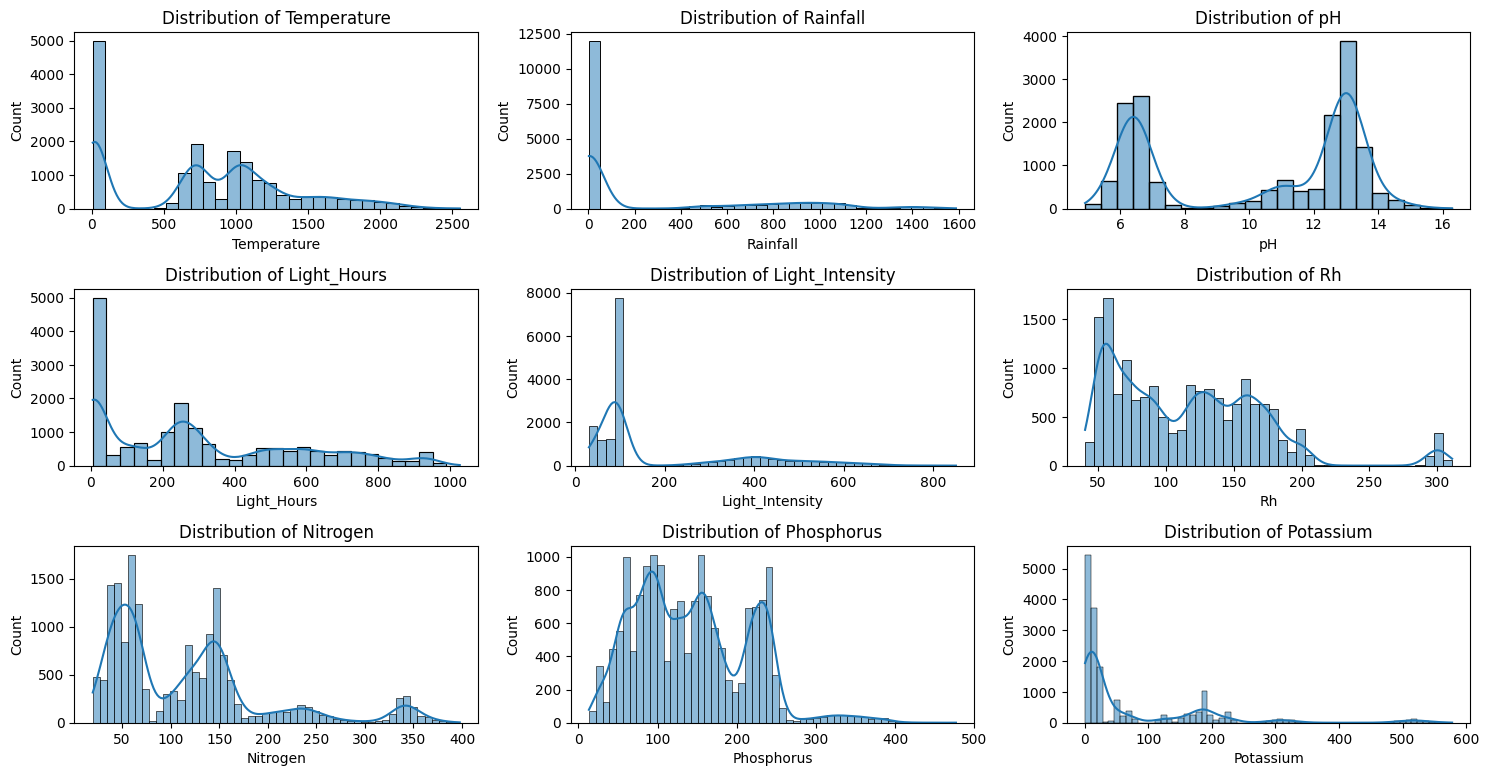

In [29]:
#histograms for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

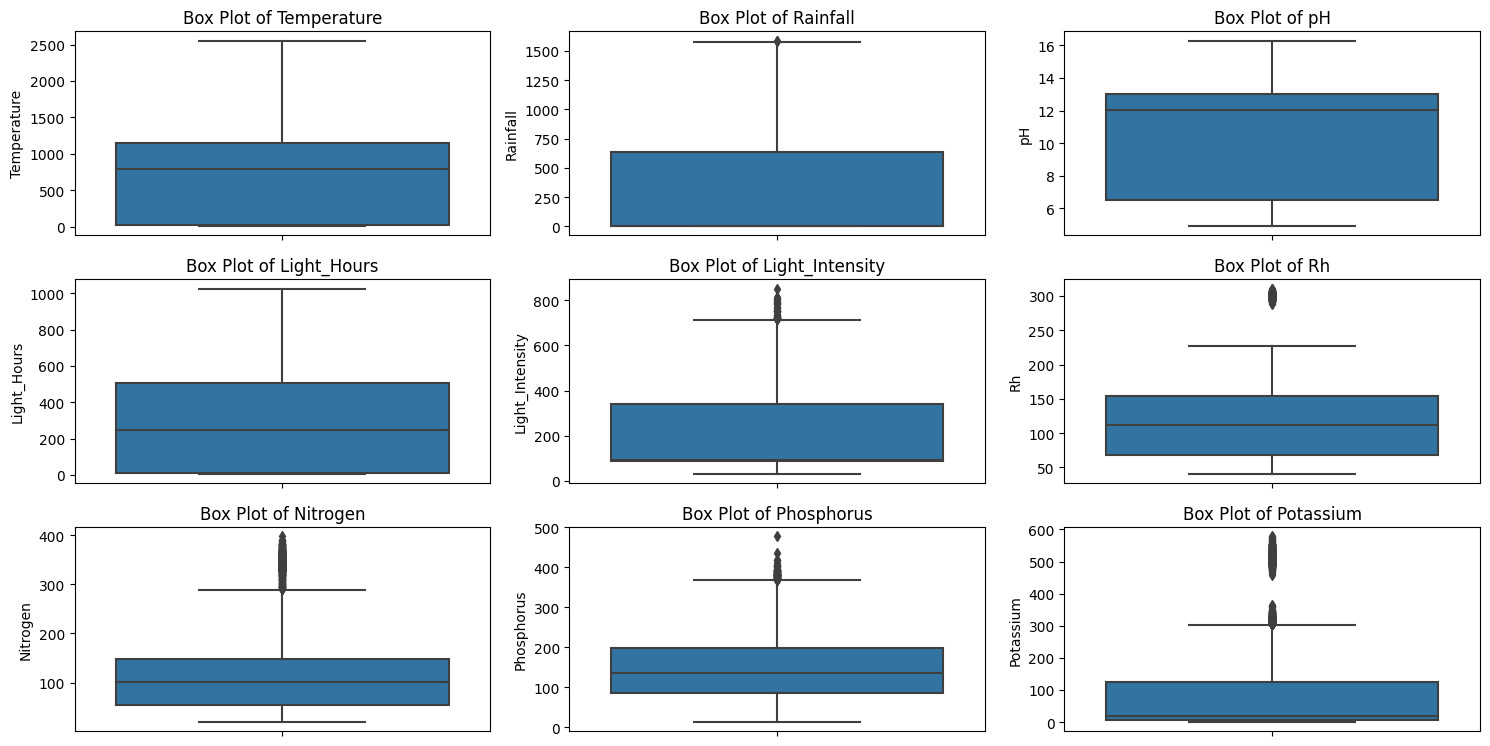

In [30]:
# Box plots for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

We can see there are ouliers in Light Intensity,Rh,Nitrogen,Phoshorous,Potassium

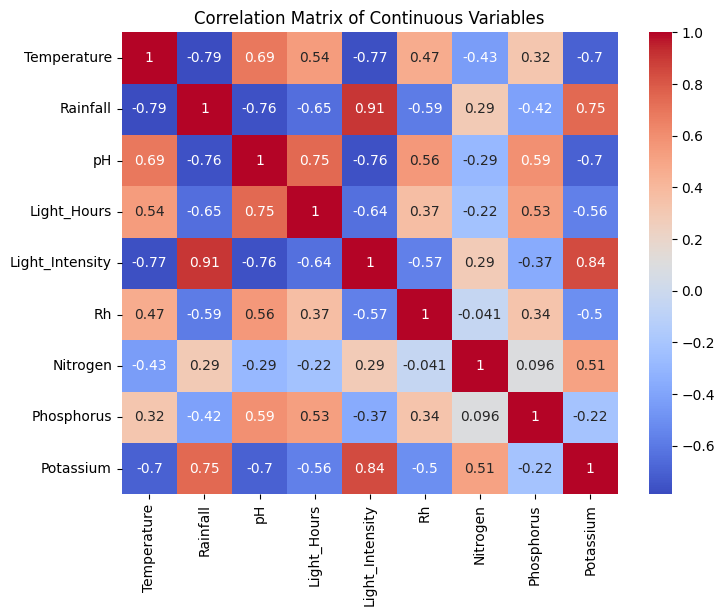

In [32]:
# Calculate the correlation matrix
corr_matrix = df[continuous_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# **Bivariate Analysis**

The goal is to understand the ideal conditions for crop with respect to each of the influencing factors

Temperature vs. Crop 
Regression plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


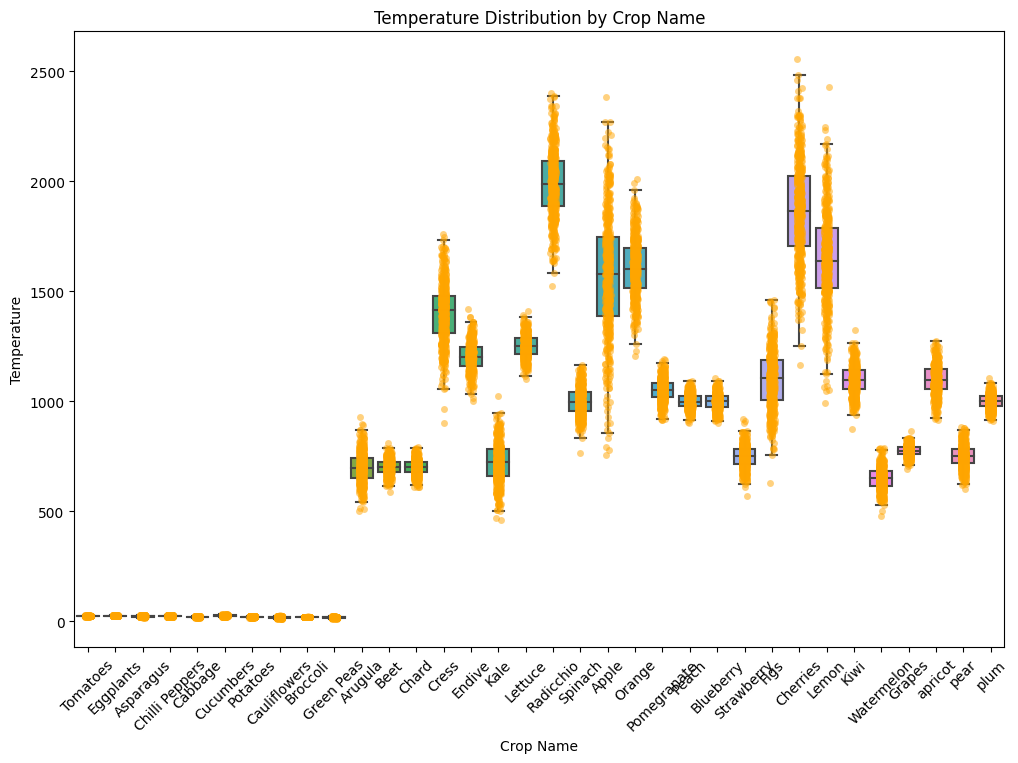

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined strip and box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Temperature', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Temperature', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Temperature Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Temperature')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

We find all vegetables grow with almost same temperature,salads and fruits require moderate temperature

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


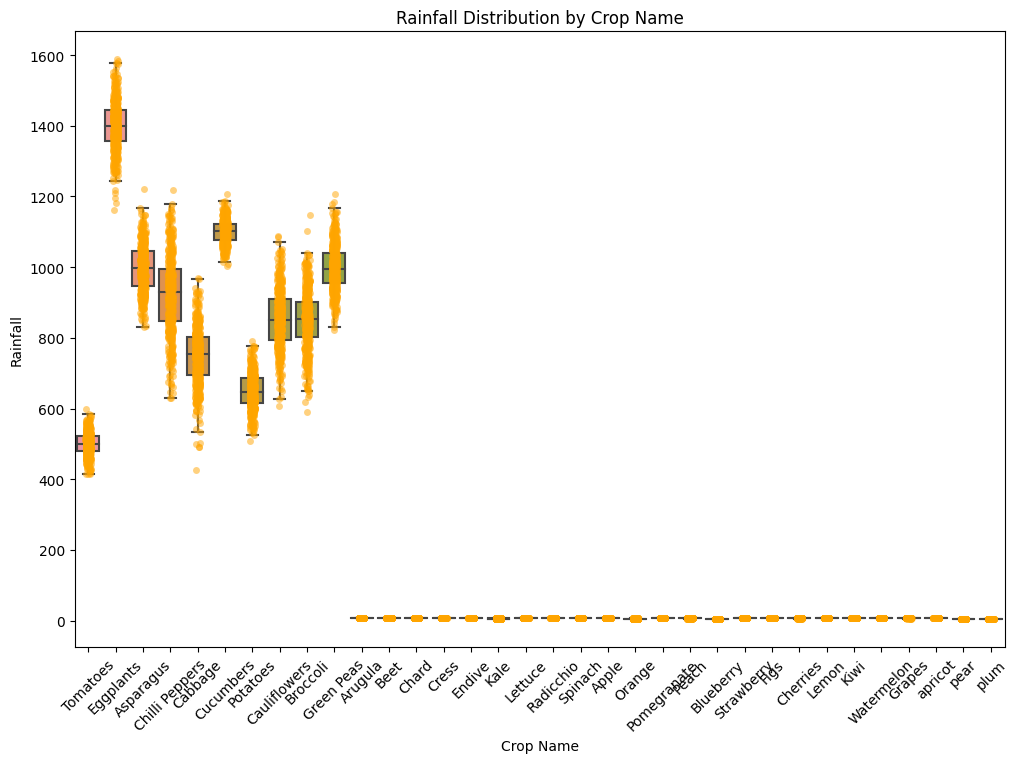

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Rainfall', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Rainfall', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Rainfall Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Rainfall')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Rainfall requirement of vegetables is high compared to salds and fruits

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


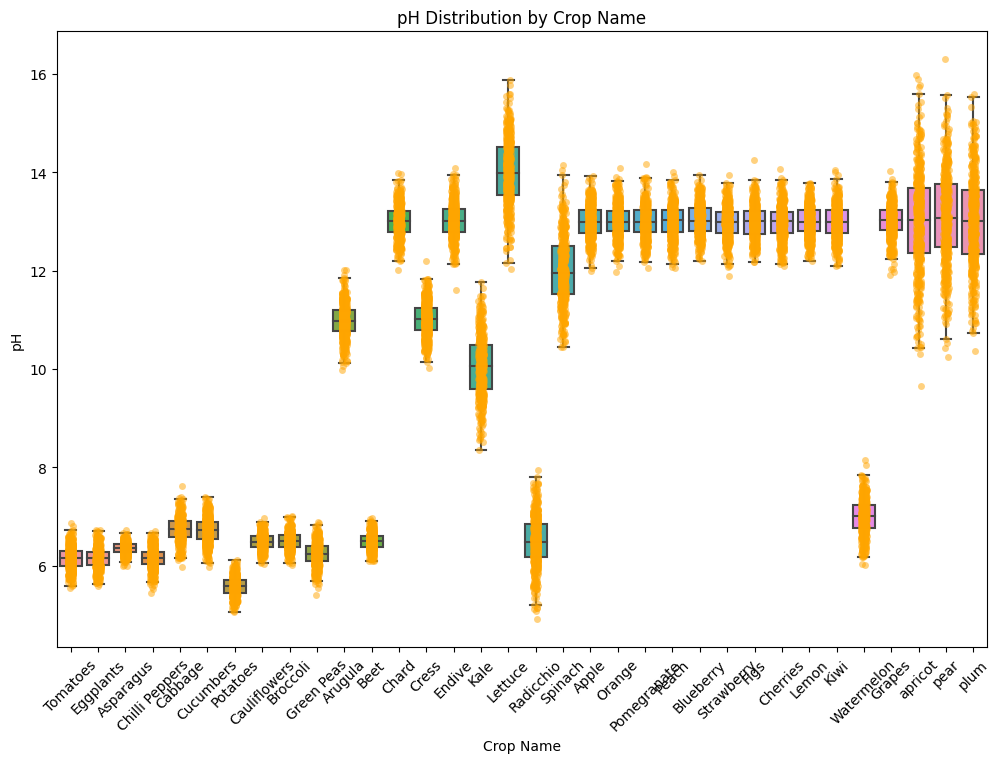

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='pH', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='pH', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('pH Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('pH')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

We can see that PH of vegetables are same,whereas lettuce grown on low ph

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


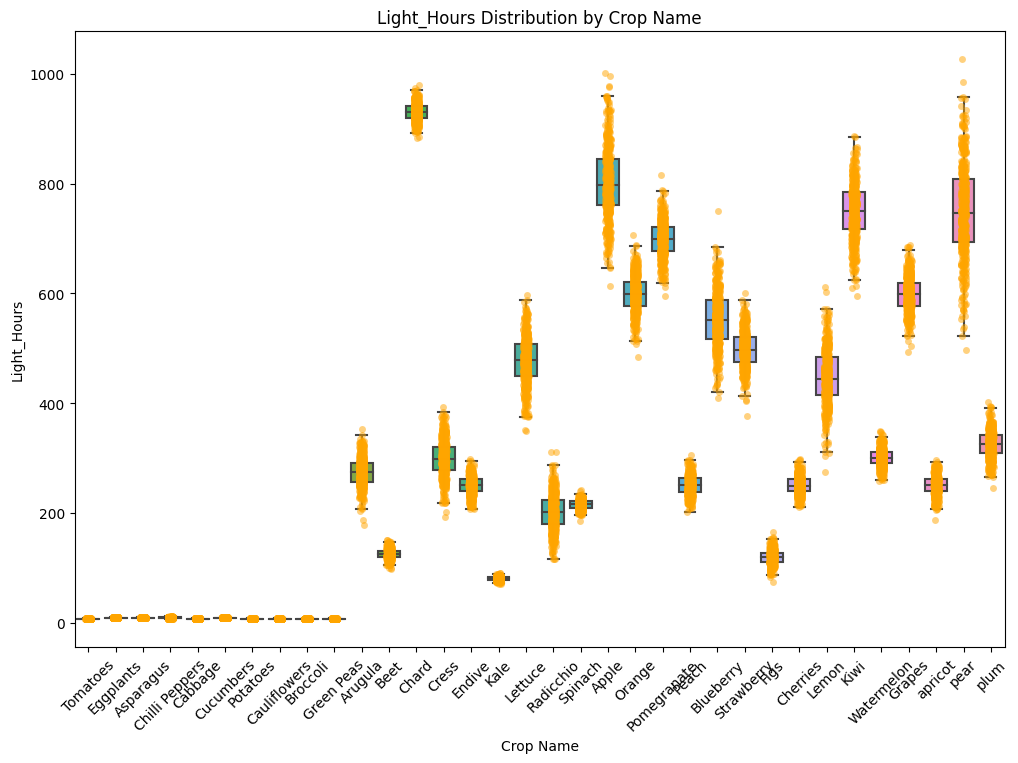

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Light_Hours', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Light_Hours', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Light_Hours Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Light_Hours')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The Light_hours requirement for vegetable is same,Spinach requires more in salads and pear requires more in fruits

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


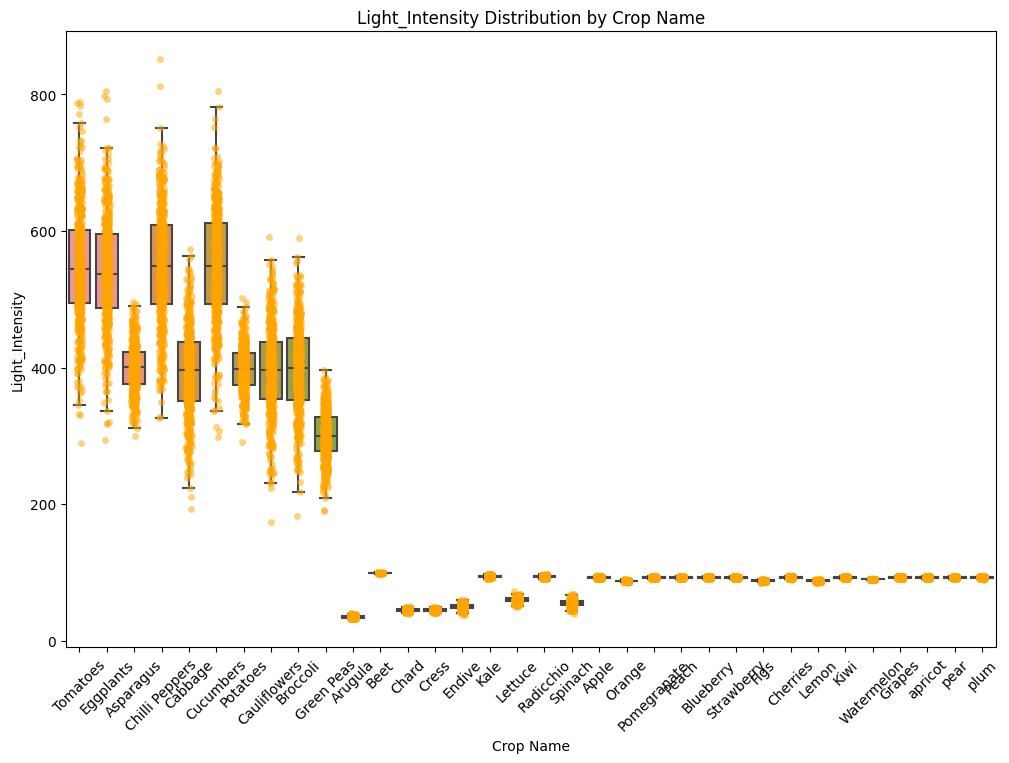

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Light_Intensity', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Light_Intensity', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Light_Intensity Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Light_Intensity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

* Vegetables require more light_intensity compared to fruits and salads
* All fruits require same light_intensity whereas salads require less light_intensity than fruits


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


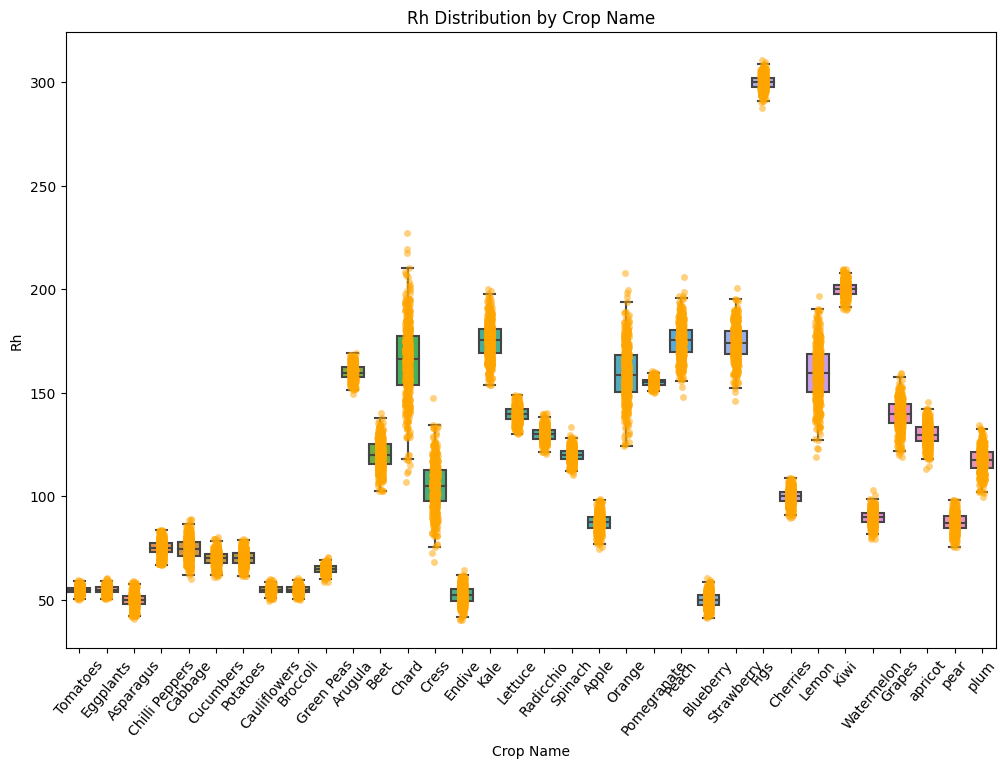

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Rh', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Rh', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Rh Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Rh')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Show the plot
plt.show()

The humidity requirement is same in vegetables.Variations are seen in fruits and salads

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


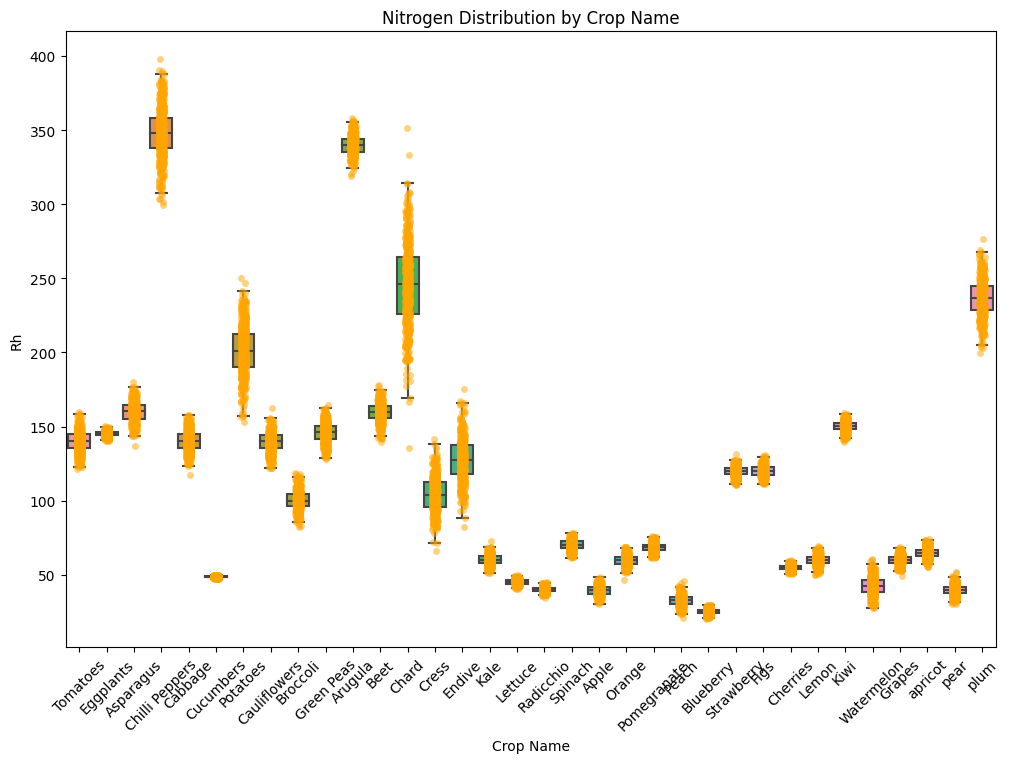

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Nitrogen', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Nitrogen', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Nitrogen Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Rh')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


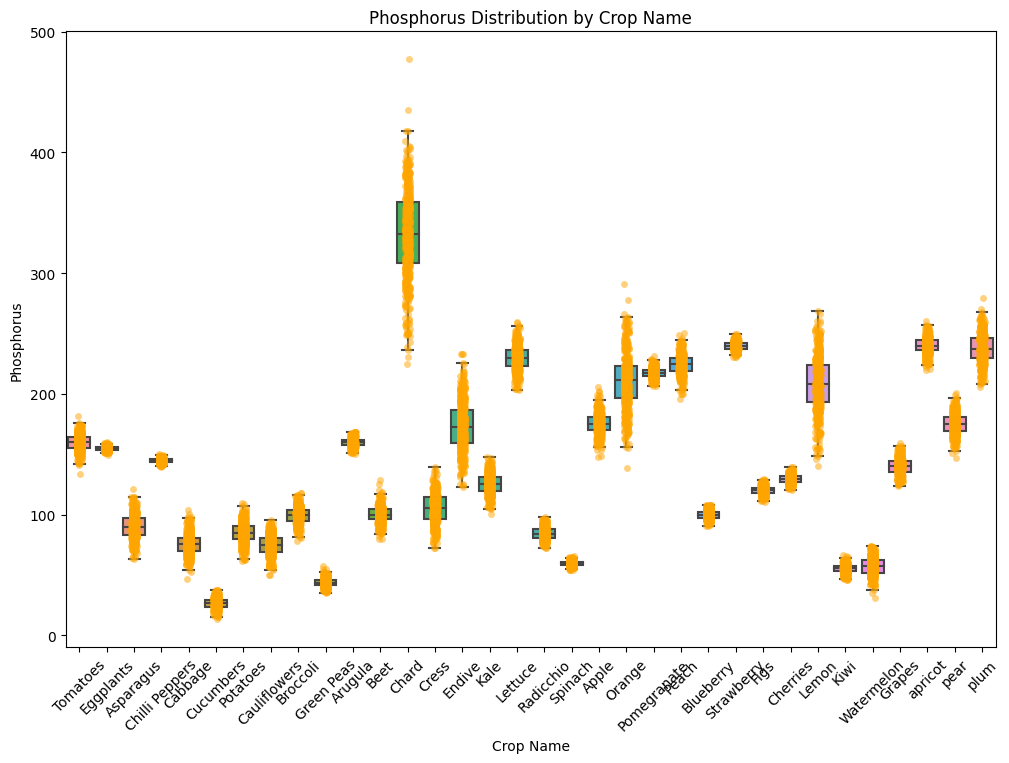

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Phosphorus', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Phosphorus', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Phosphorus Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Phosphorus')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


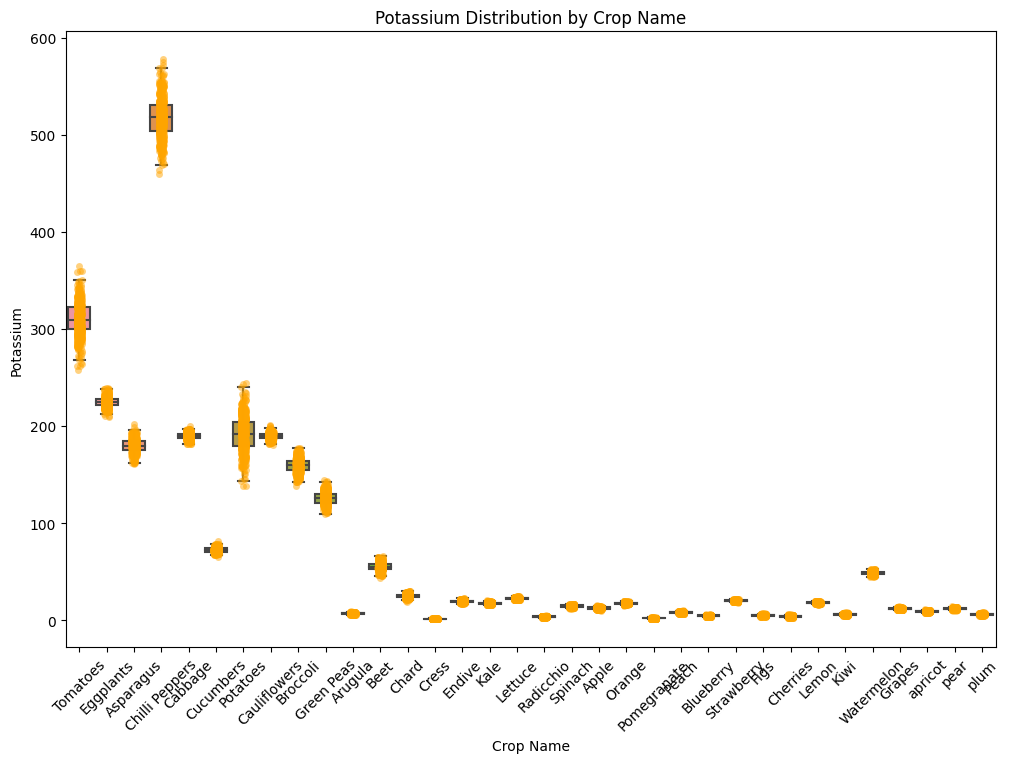

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Potassium', data=df, whis=1.5, fliersize=0)
sns.stripplot(x='Name', y='Potassium', data=df, color='orange', jitter=True, alpha=0.5)

# Set title and labels
plt.title('Potassium Distribution by Crop Name')
plt.xlabel('Crop Name')
plt.ylabel('Potassium')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Pottasium reuirement for tomato is high whereas for fruits and salads is same

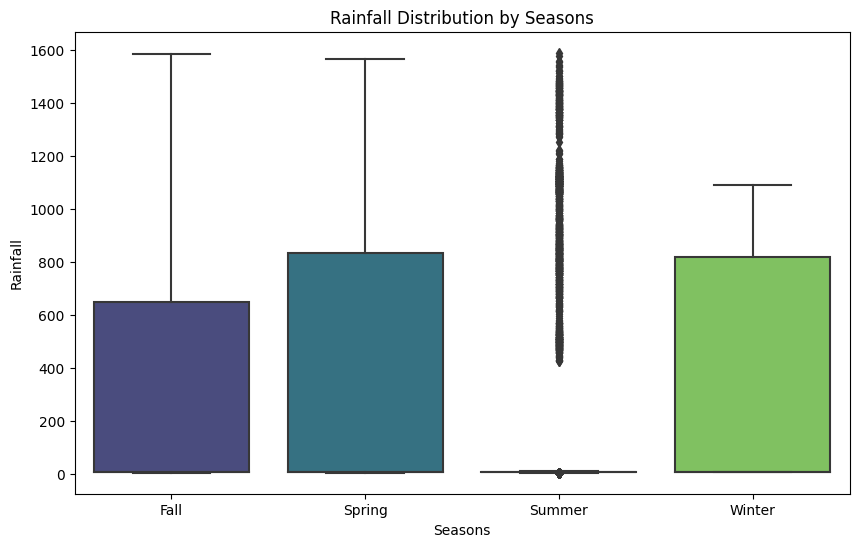

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Rainfall', data=df, palette='viridis')

# Add a title and labels
plt.title('Rainfall Distribution by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rainfall')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

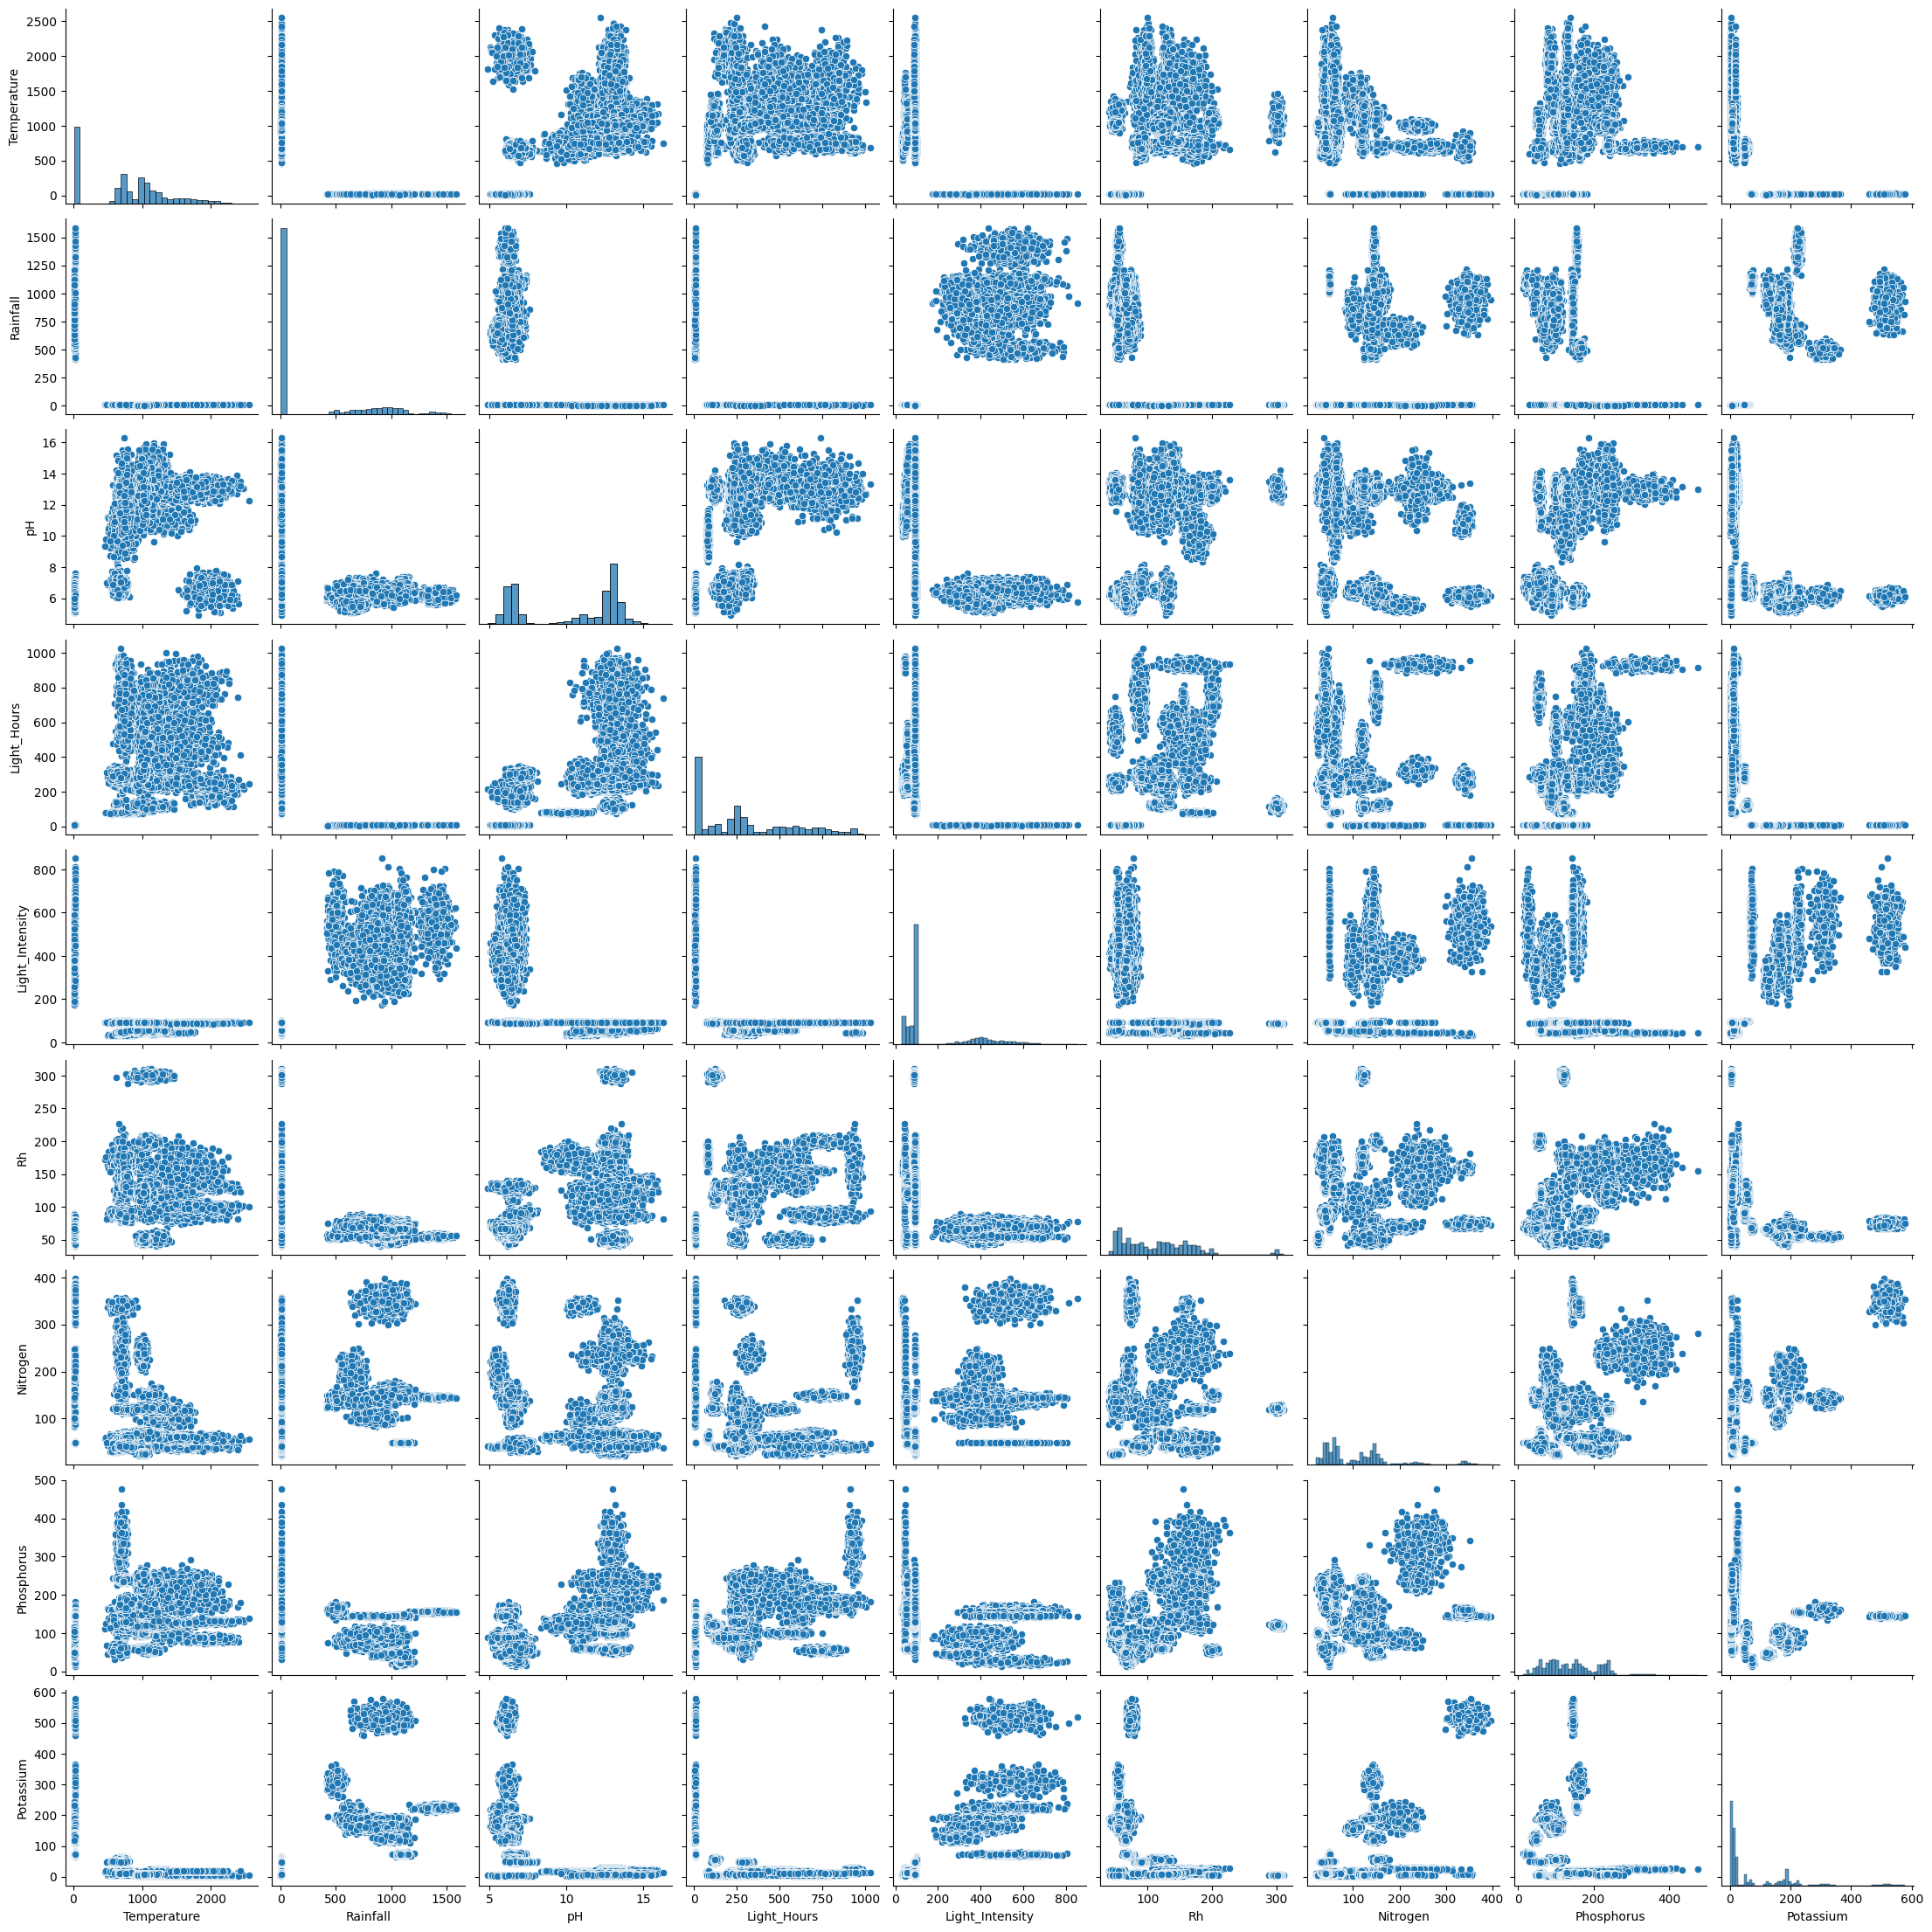

In [44]:
sns.pairplot(df)